In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Import data les données du csv

In [23]:
df = pd.read_csv('data/carData.csv')

2. Explo

In [24]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
df['Selling_Price'] = df['Selling_Price'] * 1000
df['Present_Price'] = df['Present_Price'] * 1000
df['Seller_Type'] = df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Transmission'] = df['Transmission'].replace({'Manual': 0, 'Automatic': 1})

C:\Users\inesl\AppData\Local\Temp\ipykernel_10248\3624401349.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Seller_Type'] = df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
C:\Users\inesl\AppData\Local\Temp\ipykernel_10248\3624401349.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
C:\Users\inesl\AppData\Local\Temp\ipykernel_10248\3624401349.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

2. Variable Continue 

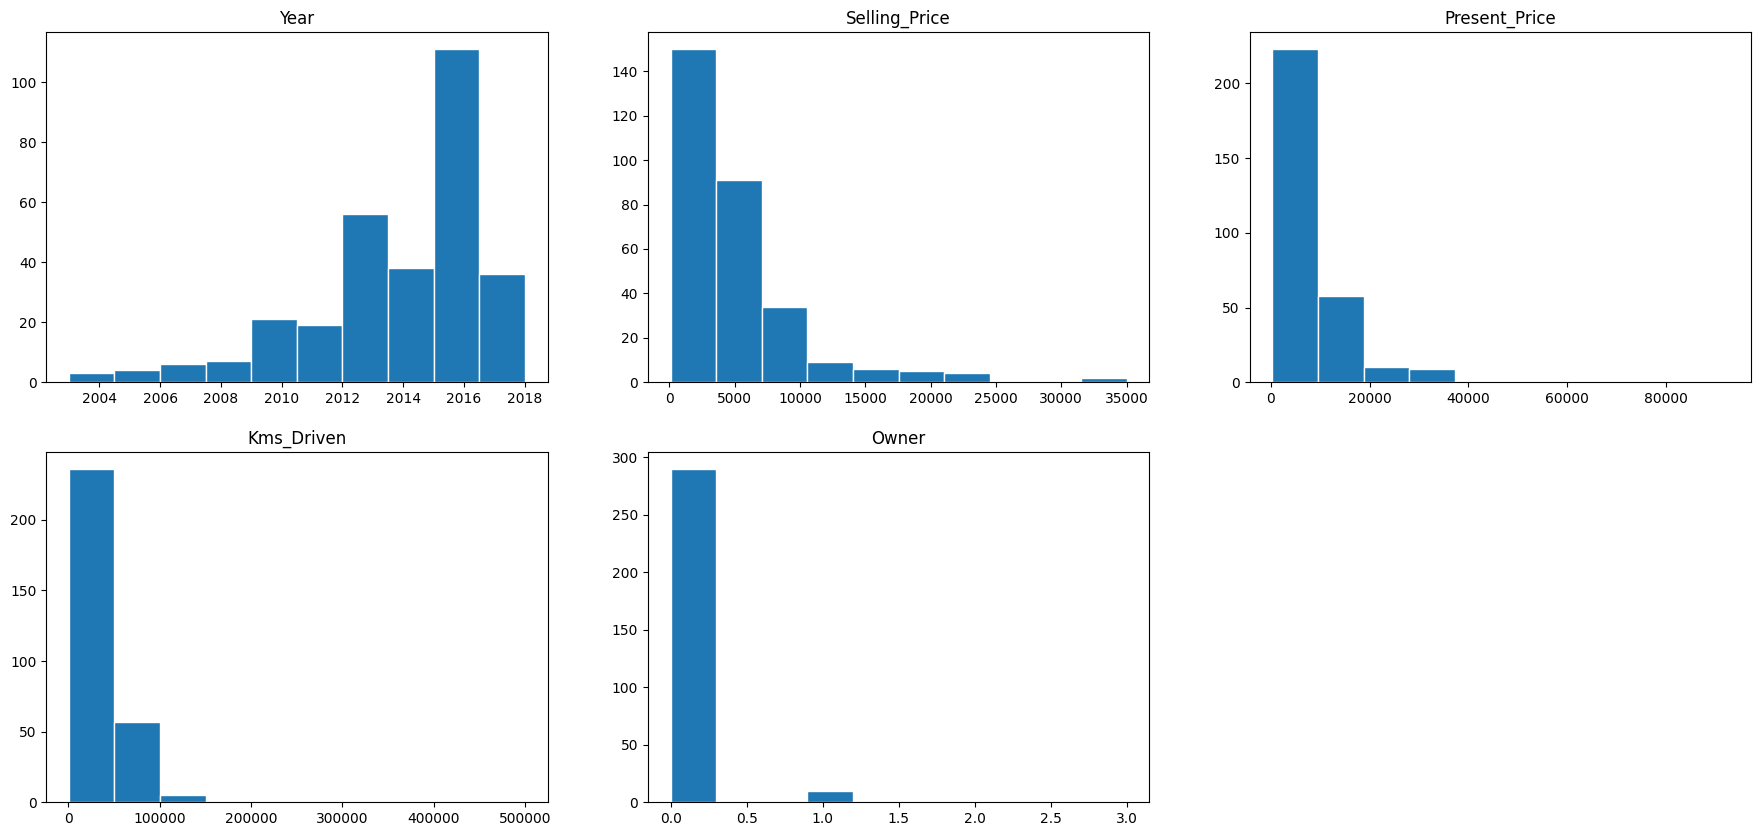

In [28]:
plt.figure(figsize=(22, 10))

cols = ['Year', 'Selling_Price','Present_Price','Kms_Driven','Owner']
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  
    plt.hist(df[col], bins=10, edgecolor='white')
    plt.title(col)
plt.show()

2. Variable Discréte

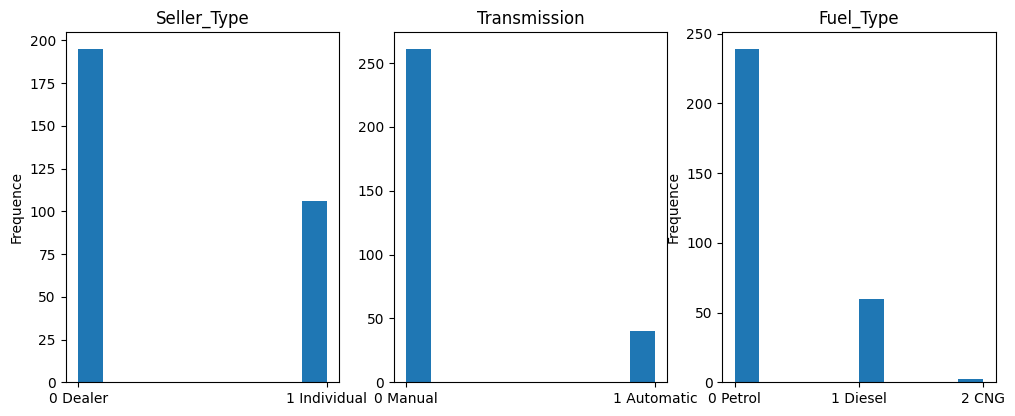

In [29]:
plt.figure(figsize=(12, 10))
plt.subplot(2,3,1)
plt.hist(df['Seller_Type'])
plt.xticks([0, 1], ['0 Dealer', '1 Individual'])
plt.title('Seller_Type')
plt.ylabel('Frequence')
plt.subplot(2,3,2)
plt.hist(df['Transmission'])
plt.xticks([0, 1], ['0 Manual', '1 Automatic'])
plt.title('Transmission')
plt.subplot(2,3,3)
plt.hist(df['Fuel_Type'])
plt.xticks([0, 1, 2], ['0 Petrol', '1 Diesel','2 CNG'])
plt.title('Fuel_Type')
plt.ylabel('Frequence')
plt.show()

4. Data Correlation de Pearson

In [35]:
df['Year'].corr(df['Selling_Price'])

0.23614098016042767

Une corrélation positive entre Year et Selling_Price signifie que les voitures récentes se vendent plus cher.

La relation entre l'âge et le prix n'est pas strictement linéaire.

La corrélation est trop faible pour que l'âge soit un bon prédicteur du prix.

Il semble y avoir une dispersion et des valeurs aberrantes.

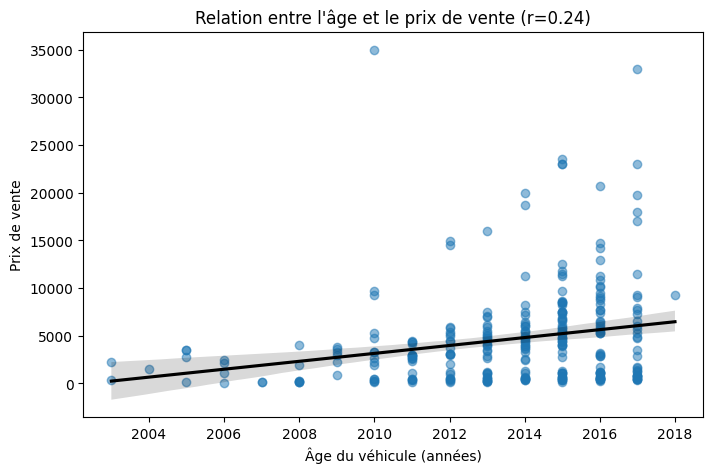

In [40]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['Year'], y=df['Selling_Price'], scatter_kws={'alpha':0.5}, line_kws={"color": "black"})
plt.xlabel("Âge du véhicule (années)")
plt.ylabel("Prix de vente")
plt.title(f"Relation entre l'âge et le prix de vente (r={df['Year'].corr(df['Selling_Price']):.2f})")
plt.show()


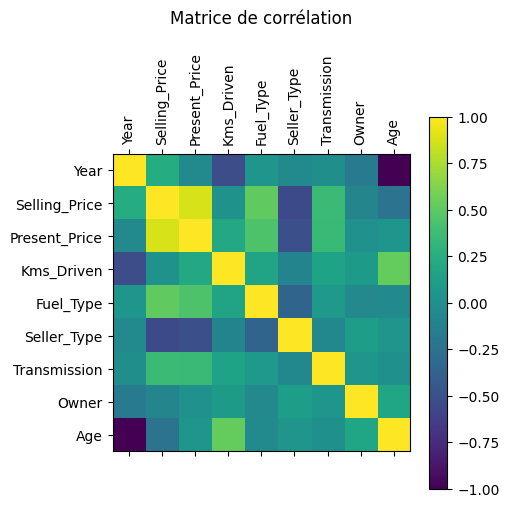

In [45]:
corr = df.corr(numeric_only=True)

plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Matrice de corrélation", pad=20)
plt.show()


Notre jeu de données n'était pas adapté pour régression linéaire car certaine colonnes tels que Transmission, Seller_Typer et Fuel_Type était des types strings. Nous les avons donc changé en interger, où un numéro correspondont a une type de données ex: Automatic = 1 pour Transmission. Notre jeu de données est maintenant adapté pour la régression linéaire

In [117]:
correlation = df.select_dtypes(include=['number']).corr ()
correlation[((correlation <= -0.3) | (correlation >= 0.3))]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,NaN,NaN,-0.524342,NaN,NaN,NaN,NaN
Selling_Price,NaN,1.000000,0.878983,NaN,0.509467,-0.550724,0.367128,NaN
Present_Price,NaN,0.878983,1.000000,NaN,0.440415,-0.512030,0.348715,NaN
Kms_Driven,-0.524342,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
Fuel_Type,NaN,0.509467,0.440415,NaN,1.000000,-0.352415,NaN,NaN
Seller_Type,NaN,-0.550724,-0.512030,NaN,-0.352415,1.000000,NaN,NaN
Transmission,NaN,0.367128,0.348715,NaN,NaN,NaN,1.000000,NaN
Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
